# 数组的排序(Sorting Arrays)

到目前为止，我们主要关注了用NumPy 获取和操作数组的工具。这一节将介绍用于排序
NumPy 数组的相关算法，这些算法是计算机科学导论课程非常偏爱的话题。如果你曾经参
加过这样的课程，你可能睡觉时都在想插入排序、选择排序、归并排序、快速排序、冒泡
排序等（这取决于你的体温，也可能是一个噩梦）。所有这些方法都是为了实现一个类似
的任务：对一个列表或数组进行排序。

例如，一个简单的选择排序重复寻找列表中的最小值，并且不断交换直到列表是有序的。
可以在Python 中仅用几行代码来实现：

In [1]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [2]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

正如任何大学一年级的计算机科学课程会告诉你的，选择排序因为其简洁而非常有用，但
是它对于大数组来说太慢了。对于一个包含N 个值的数组来说，它需要做N 个循环，每
个循环中执行~ N 次比较，以找到交换值。“大O 标记”常用来标示算法的复杂度，选择排序的平均算法复杂度为O[N 2]：如果你将列表中元素的个数翻倍，那么运行时间就会延长4 倍。

Python 包含的很多内置排序算法都比上面例子中的算法高效得多。首先介
绍Python 的内置排序算法，然后介绍NumPy 中的排序算法和优化过的NumPy 数组排
序算法。

## NumPy中的快速排序：np.sort和np.argsort

尽管Python 有内置的sort 和sorted 函数可以对列表进行排序，但是这里不会介绍这两个
函数，因为NumPy 的np.sort 函数实际上效率更高。默认情况下，np.sort 的排序算法是
快速排序，其算法复杂度为O[N log N ]，另外也可以选择归并排序和堆排序。对于大多数
应用场景，默认的快速排序已经足够高效了。

如果想在不修改原始输入数组的基础上返回一个排好序的数组，可以使用np.sort：

In [3]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

如果希望用排好序的数组替代原始数组，可以使用数组的sort 方法：

In [4]:
x.sort()
x

array([1, 2, 3, 4, 5])

另外一个相关的函数是argsort，该函数返回的是原始数组排好序的索引值：

In [5]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4], dtype=int64)

以上结果的第一个元素是数组中最小元素的索引值，第二个值给出的是次小元素的索引
值，以此类推。这些索引值可以被用于（通过花式索引）创建有序的数组：

In [6]:
x[i]

array([1, 2, 3, 4, 5])

试试多维数组的排序

In [7]:
x = np.random.randint(0,10,(4,6))
x

array([[9, 0, 9, 4, 8, 9],
       [8, 0, 5, 2, 4, 1],
       [5, 8, 7, 7, 6, 1],
       [8, 6, 7, 3, 4, 2]])

In [8]:
np.sort(x)#会对每行的数据排序np.sort(x, axis=1)

array([[0, 4, 8, 9, 9, 9],
       [0, 1, 2, 4, 5, 8],
       [1, 5, 6, 7, 7, 8],
       [2, 3, 4, 6, 7, 8]])

In [9]:
np.sort(x, axis=1)

array([[0, 4, 8, 9, 9, 9],
       [0, 1, 2, 4, 5, 8],
       [1, 5, 6, 7, 7, 8],
       [2, 3, 4, 6, 7, 8]])

#### 多维数组的排序：沿着行或列排序

In [10]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [11]:
# 对X的每一列排序
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [12]:
# 对X每一行排序
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

X.sort(X, axis=1) #会报错，没这种调用方式

需要记住的是，这种处理方式是将行或列当作独立的数组，任何行或列的值之间的关系将
会丢失！

## 部分排序：分隔

有时候我们不希望对整个数组进行排序，仅仅希望找到数组中第K 小的值，NumPy 的
np.partition 函数提供了该功能。np.partition 函数的输入是数组和数字K，输出结果是
一个新数组，最左边是第K 小的值，往右是任意顺序的其他值：

In [13]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

请注意，结果数组中前三个值是数组中最小的三个值，剩下的位置是原始数组剩下的值。
在这两个分隔区间中，元素都是任意排列的。

与排序类似，也可以沿着多维数组任意的轴进行分隔：

In [14]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

输出结果是一个数组，该数组每一行的前两个元素是该行最小的两个值，每行的其他值分
布在剩下的位置。

最后，正如np.argsort 函数计算的是排序的索引值，也有一个np.argpartition 函数计算
的是分隔的索引值，我们将在下一节中举例介绍它。

## 示例：K个最近邻

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

以下示例展示的是如何利用argsort 函数沿着多个轴快速找到集合中每个点的最近邻。首
先，在二维平面上创建一个有10 个随机点的集合。按照惯例，将这些数据点放在一个
10×2 的数组中：

In [16]:
X = rand.rand(10, 2)

为了对这些点有一个直观的印象，来画出它的散点图（如图2-10 所示）：

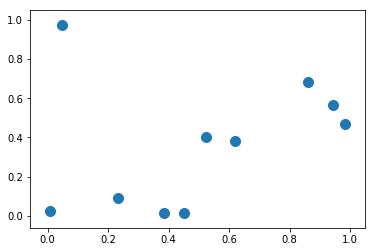

In [17]:
plt.scatter(X[:, 0], X[:, 1], s=100)

现在来计算两两数据点对间的距离。我们学过两点间距离的平方等于每个维度的距离差的
平方的和。利用NumPy 的广播和聚合功能，可以用一行代码计算矩阵的平方距离：

In [18]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

这个操作由很多部分组成。如果你对NumPy 的广播规则不熟悉的话，可能这行代码看起
来有些令人困惑。当你遇到这种代码时，将其各组件分解后再分析是非常有用的：

In [19]:
X[:, np.newaxis, :].shape

(10, 1, 2)

In [20]:
X[np.newaxis, :, :].shape

(1, 10, 2)

In [21]:
# 在坐标系中计算每对点的差值
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [22]:
# 求出差值的平方
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [23]:
# 将差值求和获得平方距离
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

请再次确认以上步骤，应该看到该矩阵的对角线（也就是每个点到其自身的距离）的值
都是0：

In [24]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

结果确实是这样的！当我们有了这样一个转化为两点间的平方距离的矩阵后，就可以使用
np.argsort 函数沿着每行进行排序了。最左边的列给出的索引值就是最近邻：

In [25]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]], dtype=int64)

需要注意的是，第一列是按0~9 从小到大排列的。这是因为每个点的最近邻是其自身，所
以结果也正如我们所想。

如果使用全排序，我们实际上可以实现的比这个例子展示的更多。如果我们仅仅关心k 个
最近邻，那么唯一需要做的是分隔每一行，这样最小的k + 1 的平方距离将排在最前面，
其他更长的距离占据矩阵该行的其他位置。可以用np.argpartition 函数实现：

In [26]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

为了将邻节点网络可视化，我们将每个点和其最近的两个最近邻连接：

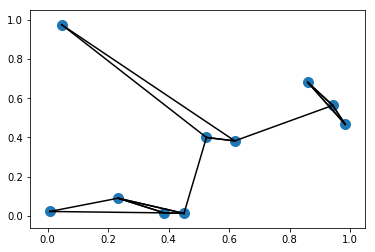

In [27]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# 将每个点与它的两个最近邻连接
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[i]到X[j]的线段
        # 用zip方法实现：
        plt.plot(*zip(X[j], X[i]), color='black')

图中每个点和离它最近的两个节点用连线连接。乍一看，你可能会奇怪为什么有些点的连
线多于两条，这是因为点A 是点B 最邻近的两个节点之一，但是并不意味着点B 一定是
点A 的最邻近的两个节点之一。

尽管本例中的广播和按行排序可能看起来不如循环直观，但是在实际运行中，Python 中
这类数据的操作会更高效。你可能会尝试通过手动循环数据并对每一组邻节点单独进行排
序来实现同样的功能，但是这种方法和我们使用的向量化操作相比，肯定在算法执行上效
率更低。并且向量化操作的优美之处在于，它的实现方式决定了它对输入数据的数据量并
不敏感。也就是说，我们可以非常轻松地计算任意维度空间的100 或1 000 000 个邻节点，
而代码看起来是一样的。

最后还想提醒一点，做大数据量的最近邻搜索时，有几种基于树的算法的算法复杂度可
以实现接近[N log N ]，或者比暴力搜索法的[N 2] 更好。其中一种就是KD-Tree，在
Scikit-Learn（http://bit.ly/2fSpdxI）中实现。

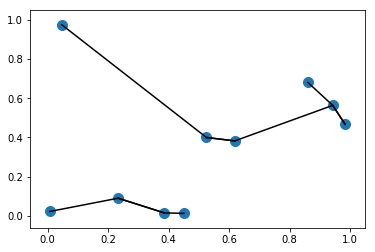

In [28]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# 将每个点与它的两个最近邻连接
K = 1

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # 画一条从X[i]到X[j]的线段
        # 用zip方法实现：
        plt.plot(*zip(X[j], X[i]), color='black')